In [ ]:
from phobert_svm_pipeline import (
    embed_and_save_simple
)
embed_and_save_simple("dataset/thanhnien_articles_normalized.csv", "models/svm/X_test_real_data_emb.npy", batch_size=16)

d:\DoAnTotNghiep\Document_Classification_With_Cuckoo_Search\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


>> Loading PhoBERT from local: models/phobert-base
✅ Saved embeddings (7750, 768) -> models/phobert_svm_model/X_test_real_data_emb.npy


Accuracy: 0.7840

Classification Report:

                   precision    recall  f1-score   support

        chính trị       0.79      0.88      0.83       775
        công nghệ       0.87      0.62      0.72       775
         giáo dục       0.79      0.84      0.81       775
          kinh tế       0.71      0.69      0.70       775
        pháp luật       0.90      0.95      0.92       775
sức khỏe đời sống       0.45      0.65      0.53       775
         thế giới       0.99      0.54      0.70       775
         thể thao       0.99      0.92      0.95       775
 văn hóa giải trí       0.75      0.80      0.78       775
               xe       0.86      0.96      0.91       775

         accuracy                           0.78      7750
        macro avg       0.81      0.78      0.79      7750
     weighted avg       0.81      0.78      0.79      7750



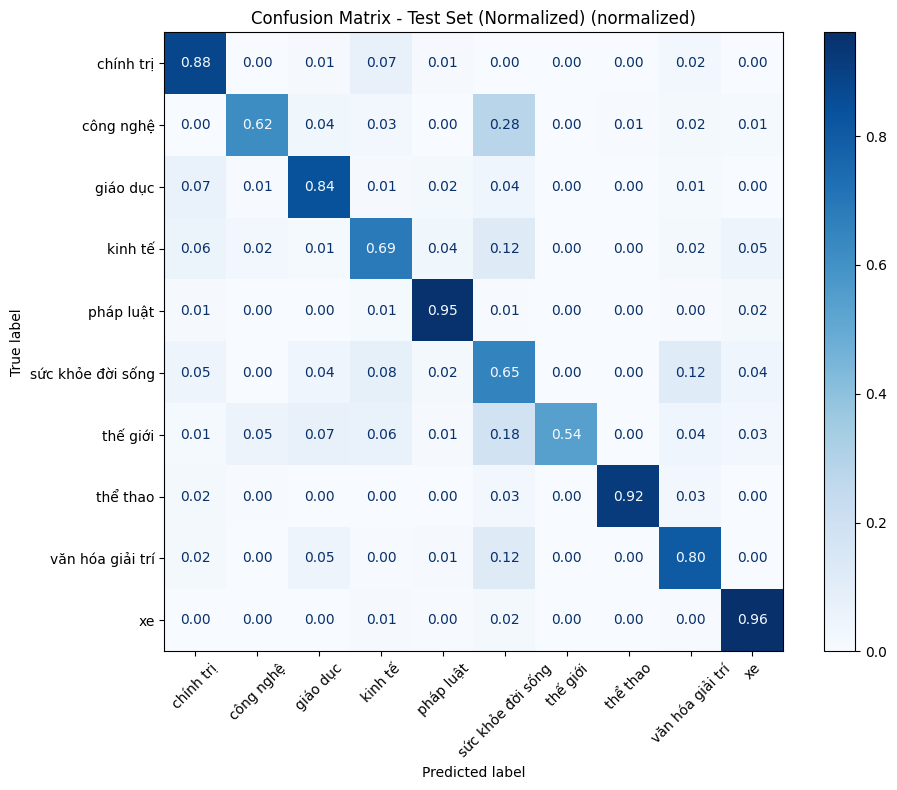

d:\DoAnTotNghiep\Document_Classification_With_Cuckoo_Search\.venv\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


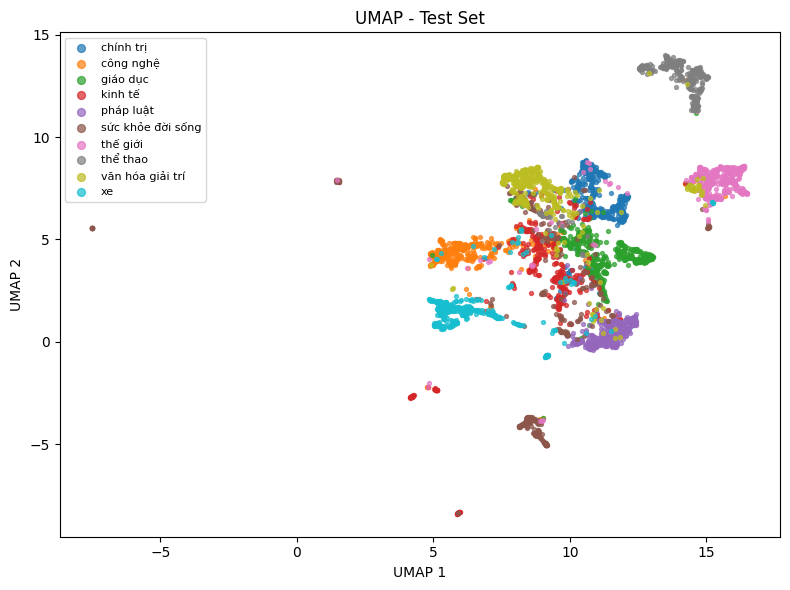

In [7]:
# -*- coding: utf-8 -*-
import numpy as np
import joblib
import pandas as pd
from sklearn.metrics import classification_report, accuracy_score
from phobert_svm_pipeline import (
    evaluate_confusion_matrix,
    plot_umap_embeddings,
)

# ===== Load data/model =====
df = pd.read_csv("dataset/thanhnien_articles_normalized.csv", encoding="utf-8-sig")

X_test  = np.load("models/svm/X_test_real_data_emb.npy")
le      = joblib.load("models/svm/label_encoder.joblib")
clf     = joblib.load("models/svm/svm_cso_optimized_2.joblib")
y_test = le.transform(df["topic"])

# ===== Predict & metrics =====
y_pred = clf.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# ===== 1) Confusion Matrix (dùng embedding sẵn) =====
evaluate_confusion_matrix(
    clf, le,
    X_emb=X_test,
    y_true_labels=y_test,   # có thể truyền y_test (int) hoặc le.inverse_transform(y_test)
    normalize=True,
    title="Confusion Matrix - Test Set (Normalized)"
)

# ===== 2) UMAP (dùng embedding sẵn) =====
# Yêu cầu: pip install umap-learn
plot_umap_embeddings(
    X_emb=X_test,
    y_int=y_test,
    le=le,
    title="UMAP - Test Set"
)
